In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel('Top100(farhan).xlsx')
df2 = pd.read_excel('Top100(spotify).xlsx')

In [7]:
df = df.drop(['id','uri'], axis =1)

In [10]:
sns.set(style='whitegrid')

### Spotify Analysis

Introduction - Music has always been important to me. I've wondered if throughout 2018, I preferred certain attributes in music or did I prefer more diverse spread? I've always thought of myself as "non-mainstream", listening to music fewer people would listen to or seek out. I've attempted to analyse my top 100 tracks of 2018 based on the multiple audio features and then compare it to Spotify's top 100 most played tracks.

Project objectives:

- To gain insights on what features of music I tend to listen to
- To compare my music preferences with the "mainstream" crowd on Spotify and determine if my music preferences are as unique as I perceive them to be
- To explore if there is any correlation between the features of a track (e.g. a high energy track would be more likely to have higher valence)

Method
Data gathering was performed in Python. I utilized Spotipy, a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.

I worked with two playlists:

- My own top 100 tracks of 2018, provided by Spotify based on what I listened to throughout the year
- Spotify's top 100 most played tracks

I retrieved the audio features for each track in these playlists, analysed them and plot the distribution of the respective features across the 100 songs in each playlist.

I've plotted the Top 100 most played tracks of Spotify in grey for each feature to contrast against my top 100 tracks of 2018.

Some examples of audio features for the track Spotify provides(through their acquisition of EchoNest) include:
- Tempo
- Energy
- Danceability of a track etc.

At the end, I utilize logistic regression to predict viability and ranking of songs based on the audio features.

In [46]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature
0,0.302,0.696,292987,0.521,0.000000,10,0.0565,-8.465,0,0.3320,100.000,0.458,4
1,0.156,0.652,304607,0.795,0.000000,11,0.1230,-5.192,0,0.1740,135.018,0.788,4
2,0.498,0.736,230813,0.795,0.000001,1,0.2540,-3.299,0,0.0545,104.066,0.511,4
3,0.126,0.624,234213,0.460,0.000000,6,0.0871,-6.403,0,0.2870,166.033,0.643,4
4,0.874,0.776,210285,0.503,0.000000,0,0.1120,-5.732,0,0.2370,110.134,0.473,4


In [17]:
print(df.mean())

acousticness             0.337277
danceability             0.637182
duration_ms         239650.171717
energy                   0.552087
instrumentalness         0.000501
key                      5.424242
liveness                 0.202764
loudness                -7.411566
mode                     0.545455
speechiness              0.139500
tempo                  117.855323
valence                  0.413058
time_signature           3.959596
dtype: float64


In [22]:
print(df2.mean())

acousticness             0.187666
valence                  0.502772
danceability             0.656920
duration_ms         222852.740000
energy                   0.654580
instrumentalness         0.003868
key                      4.920000
liveness                 0.160166
loudness                -5.862110
mode                     0.570000
speechiness              0.088987
tempo                  117.429440
time_signature           4.000000
dtype: float64


### Valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive(e.g. happy, cheerful, euphoric), #while tracks with low valence sound more negative (e.g. sad, depressed, angry)

The valence distribution for my top 100 songs of 2018 seems normally distributed, displaying no preference for overly cheery or depressing songs.

Spotify's top 100 most played displays a higher average valence, indicating a preference for happier songs in general.

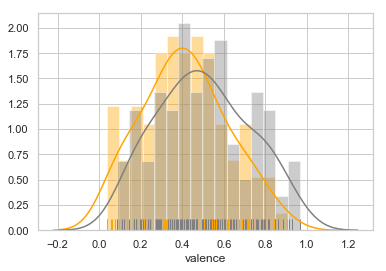

In [26]:
sns.distplot(df['valence'],bins=15, kde=True, rug=True, color='orange')
sns.distplot(df2['valence'],bins=15, kde=True, rug=True, color='grey')

### Loudness

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

The loudness distribution for my top 100 songs of 2018 is skewed to the right, indicating a slight preference for louder music.

Spotify's top 100 most played tracks are louder than my top 100. A speculative reason could be the Loudness War, referring to the trend of increasing audio levels in recorded music. Many critics believe this reduces sound quality and dynamic range of the track, apparent in pop songs where ultra-compression occurs.

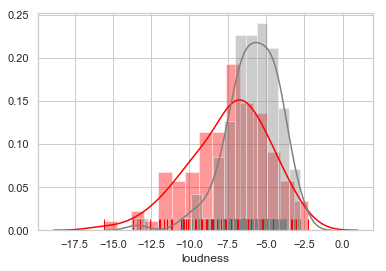

In [27]:
sns.distplot(df['loudness'],bins=15, kde=True, rug=True, color='red')
sns.distplot(df2['loudness'],bins=15, kde=True, rug=True, color='grey')

### Energy

A measure from 0.0 to 1.0 reoresenting a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

My top 100 tracks are normally distributed in terms of energy, indicating little preference for either side. I listen to a variety of music so this make sense as I'm not restricted to a particular music style.

Spotify's top 100 most played generally displays higher energy tracks.

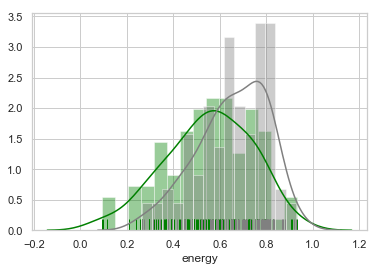

In [28]:
sns.distplot(df['energy'],bins=15, kde=True, rug=True, color='green')
sns.distplot(df2['energy'],bins=15, kde=True, rug=True, color='grey')

### Acousticness

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Preference is shown for non-acoustic songs. 

I listen to acoustic tracks but generally prefer a fuller band setting with other instruments.

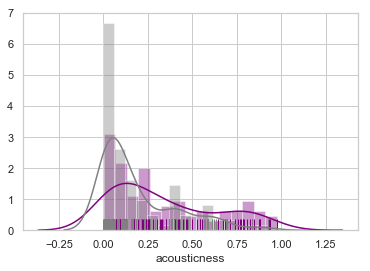

In [29]:
sns.distplot(df['acousticness'],bins=15, kde=True, rug=True, color='purple')
sns.distplot(df2['acousticness'],bins=15, kde=True, rug=True, color='grey')

### Speechiness

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 
- Values above 0.66 describe tracks that are probably made entirely of spoken words. 
- Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. 
- Values below 0.33 most likely represent music and other non-speech-like tracks.

The distribution histogram shows a preference towards less spoken word in proportion to instrumentation. Although I listen to a great deal of instrumental music, I also listen to Rap & R&B which should indicate a higher speechiness score.

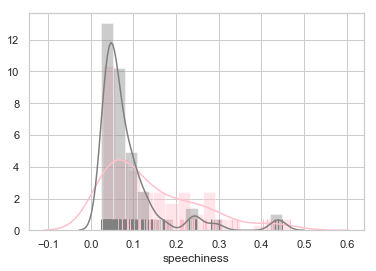

In [30]:
sns.distplot(df['speechiness'],bins=15, kde=True, rug=True, color='pink')
sns.distplot(df2['speechiness'],bins=15, kde=True, rug=True, color='grey')

## Duration

Most of the songs seem to last in the range of about 200,000ms = 3.3 mins~. There exists outliers due to the nature of the genre. Most songs I listen to tend to fall around this range with the exception of prog-rock and instrumentals, which usually are longer and may represent the outliers that we see below.

Both datasets display similar duration for the songs. Spotify's top 100 reveals that most mainstream songs generally have a similar play time, suggesting preference for radio-friendly song durations.

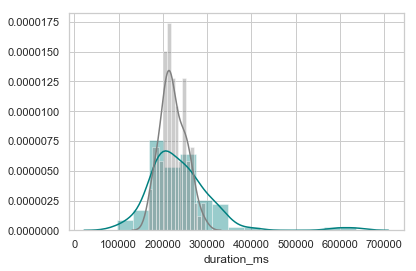

In [32]:
sns.distplot(df['duration_ms'], bins=15, color='teal')
sns.distplot(df2['duration_ms'], bins=15, color='grey')

### Danceability 

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

The graph displays a slight skew to the right, indicating my preference for more 'danceable songs'. The moderately high number of R&B tracks(typically beat-centric) could have had a major contribution to the skew.

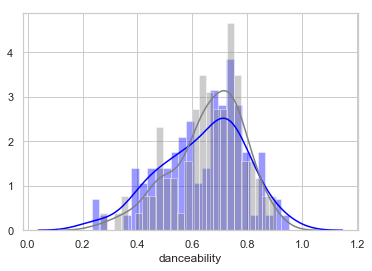

In [33]:
sns.distplot(df['danceability'], bins=25, color='blue')
sns.distplot(df2['danceability'], bins=25, color='grey')

### Tempo 

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

My top 100 songs generally have a higher tempo compared to Spotify's top 100 most played songs.

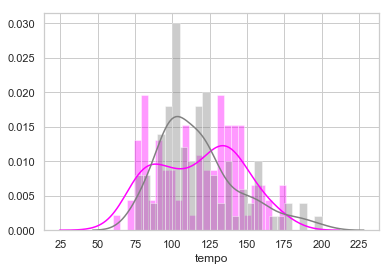

In [34]:
sns.distplot(df['tempo'], bins=25, color='magenta')
sns.distplot(df2['tempo'], bins=25, color='grey')

### Exploratory Data Analysis

Pairplots for both datasets are plotted to determine if there is any correlation between any of the features.

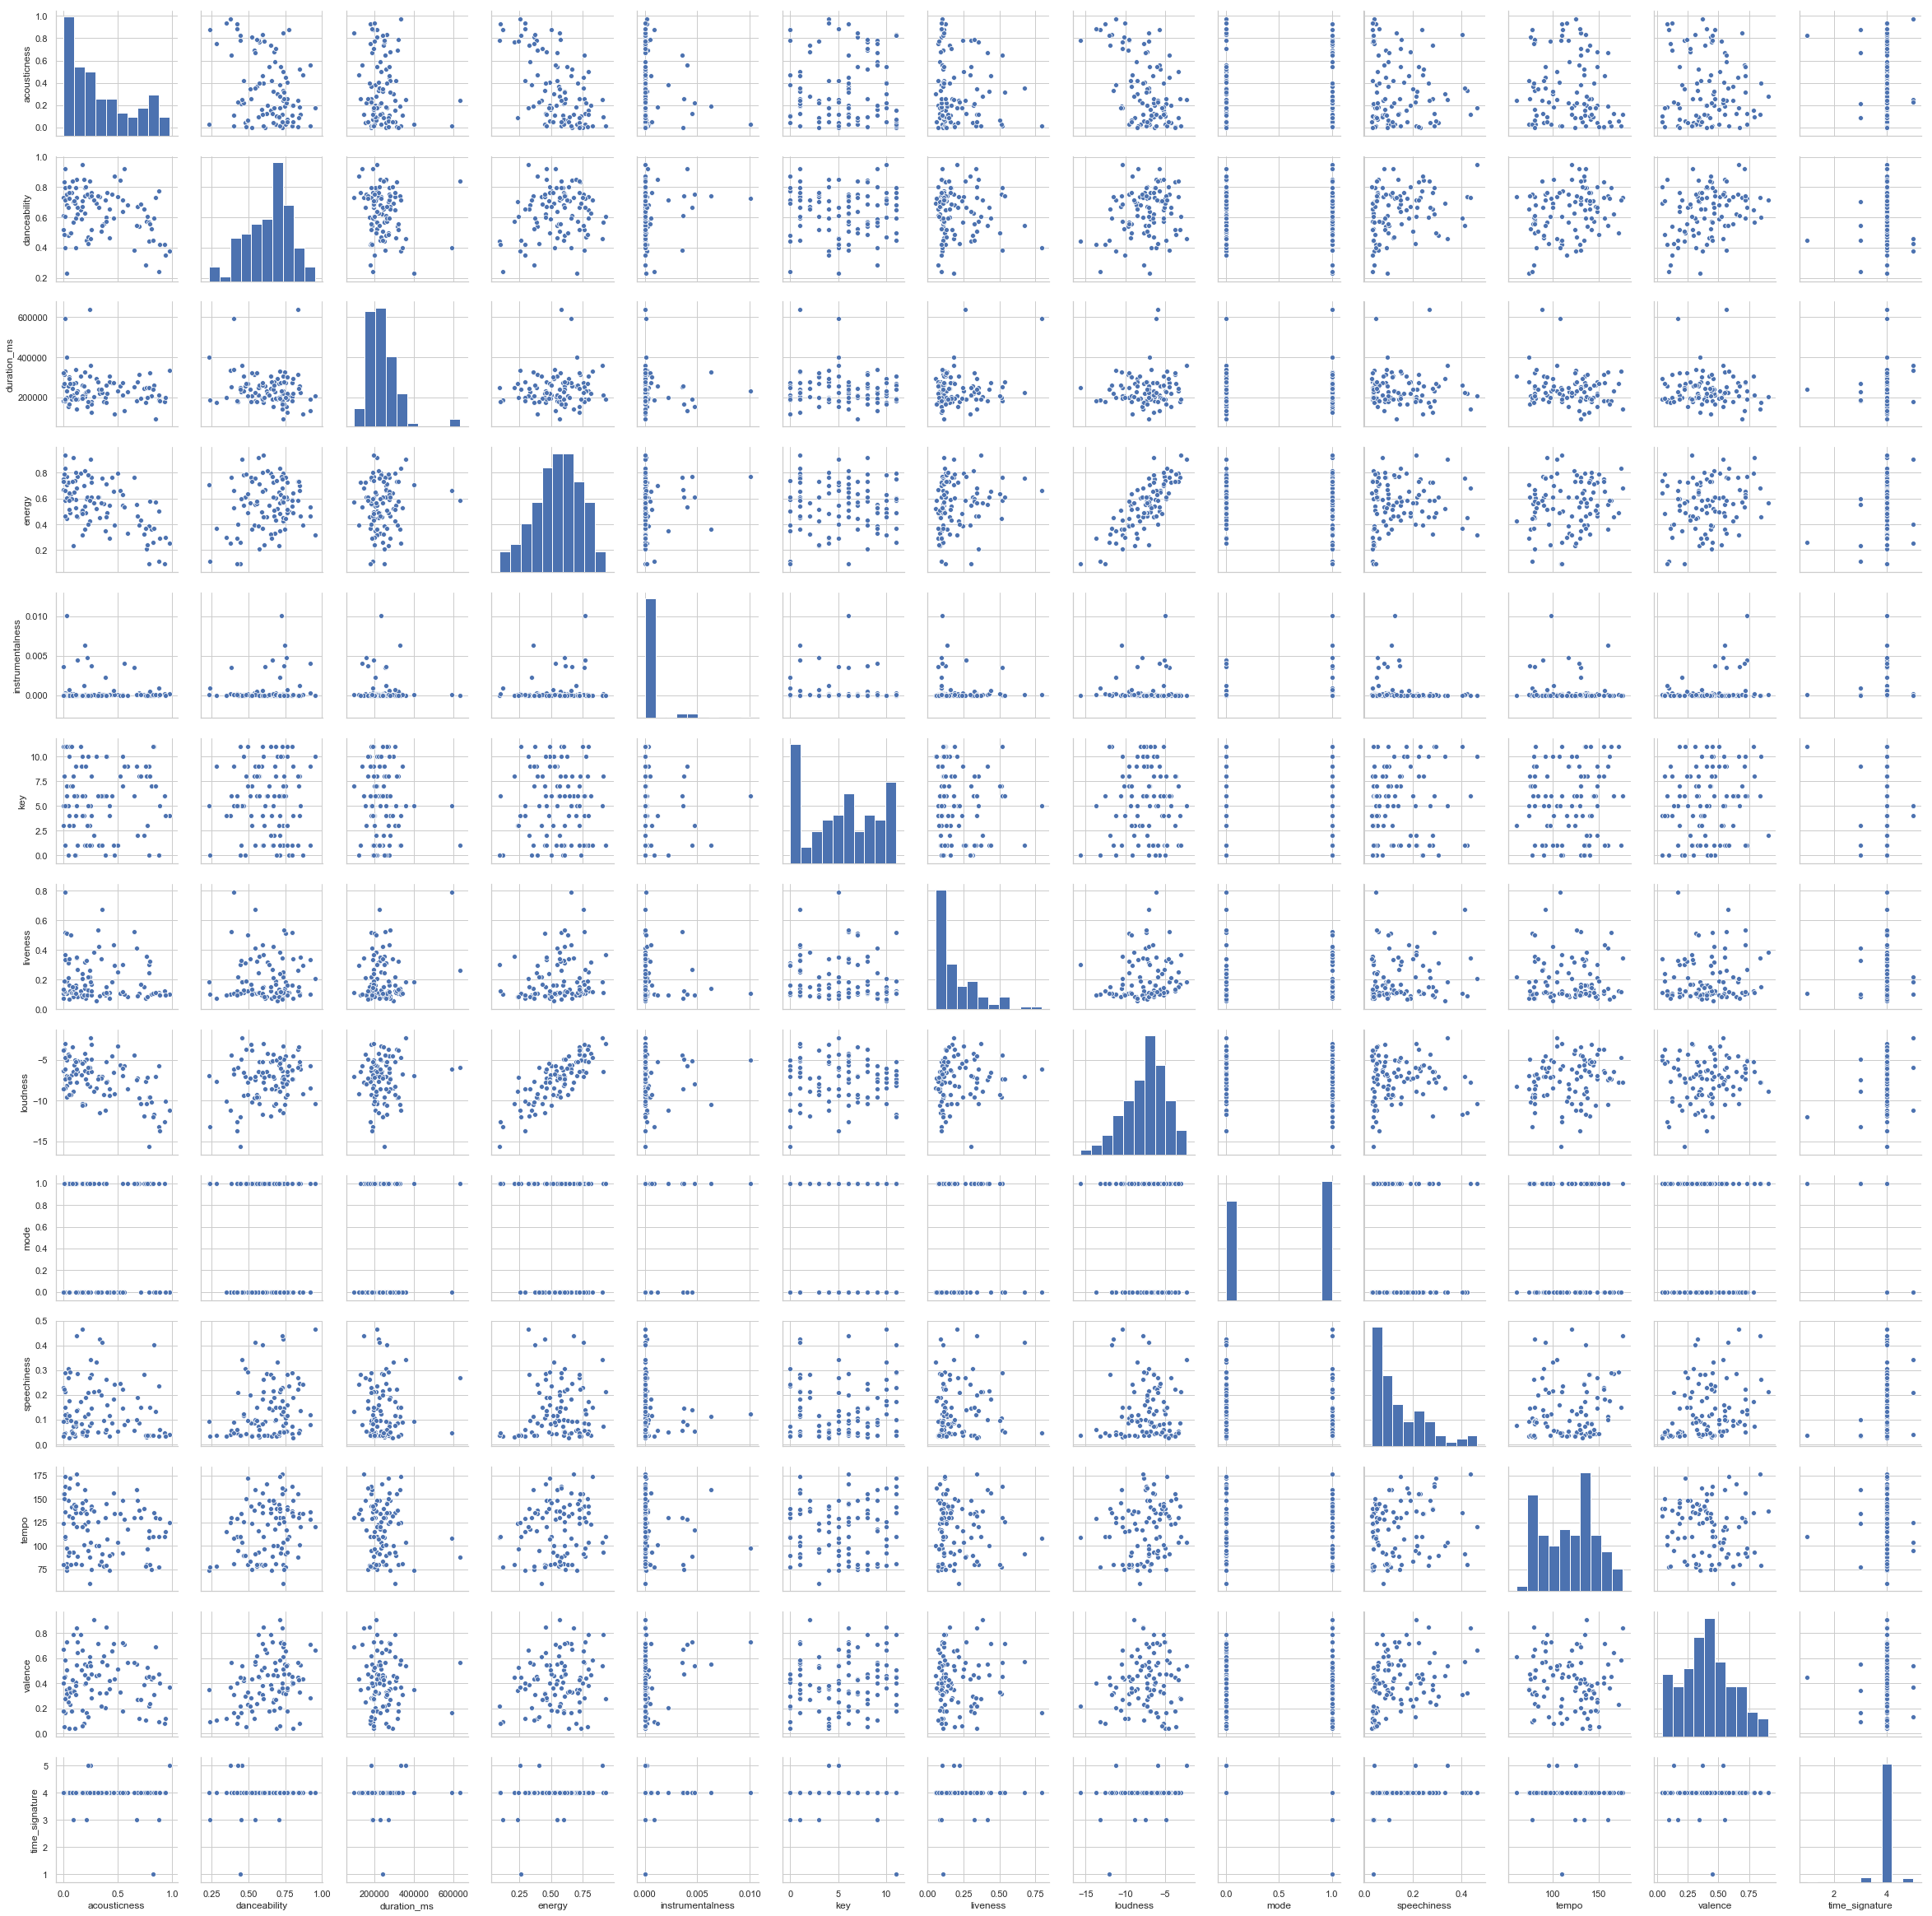

In [35]:
sns.pairplot(df)

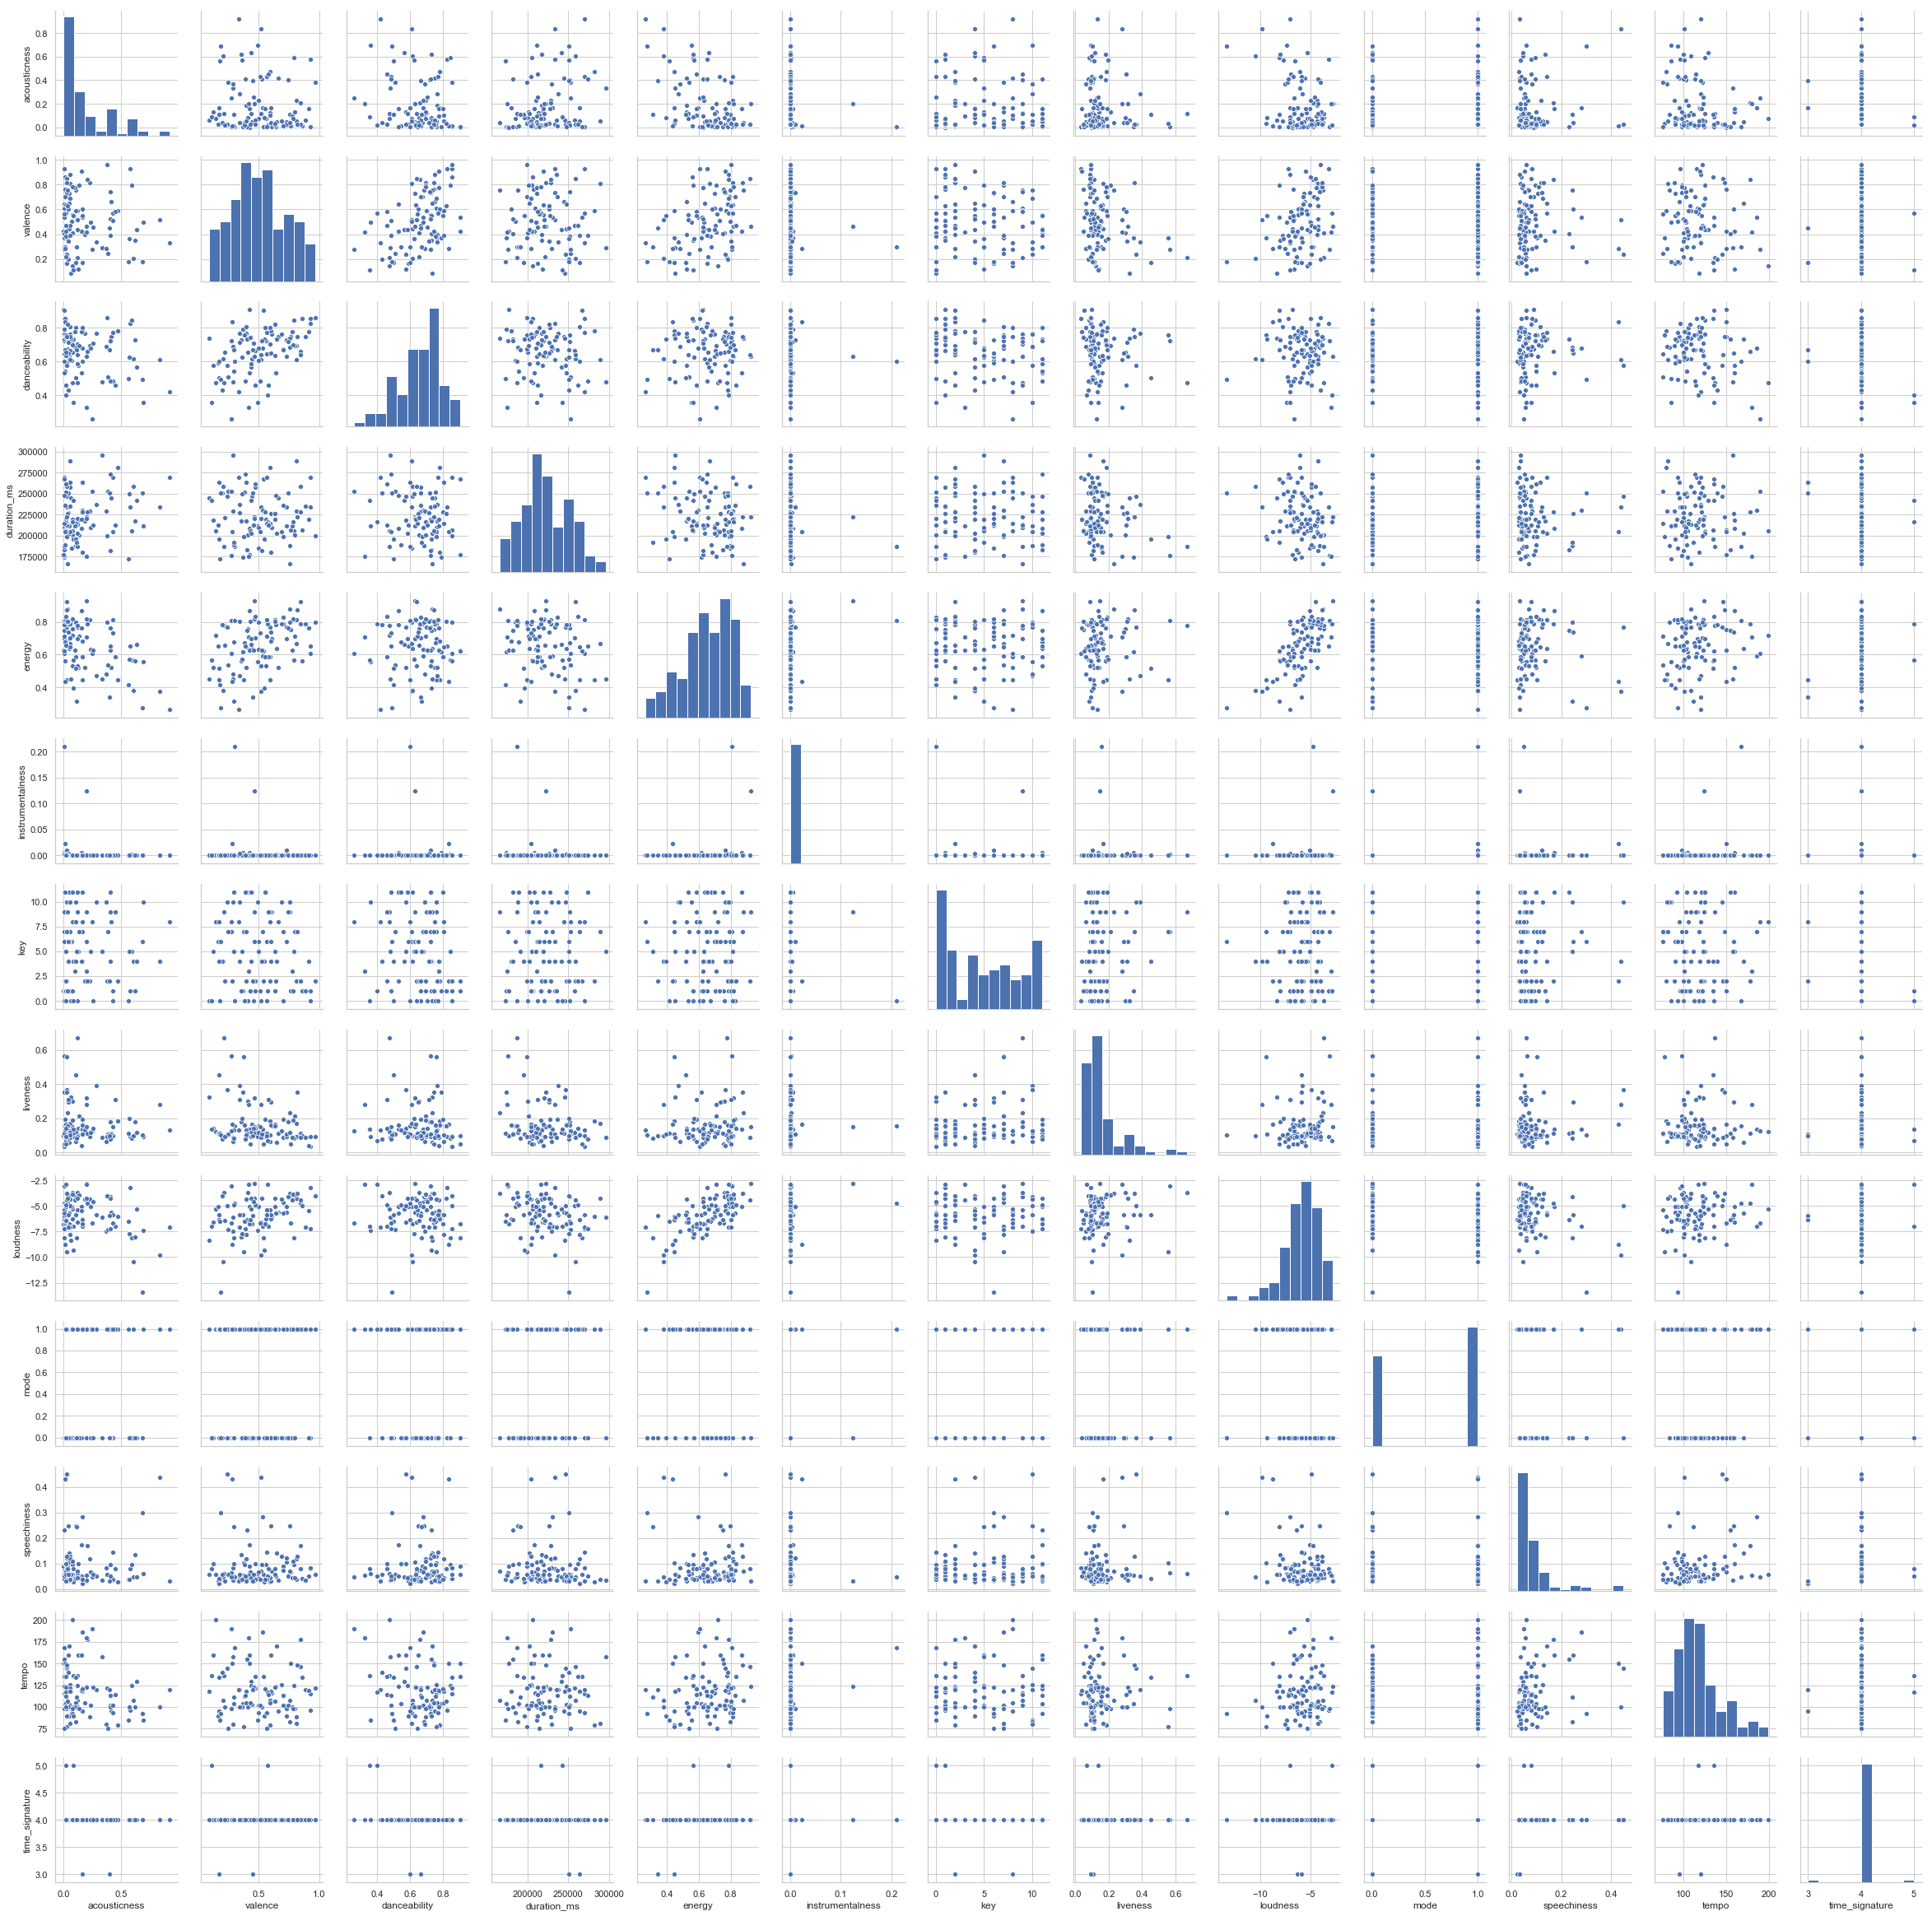

In [36]:
sns.pairplot(df2)

### Correlation

We can observe from the pairplots above that there is a correlation between the loudness and the perceived energy of the song. The jointplots below are from both datasets and indicate a correlation between the two.

The louder the song is, the more energetic it is perceived to be. There is a correlation between the "danceability" and "valence" of a track but it is not as obvious or apparent as the previous correlation.


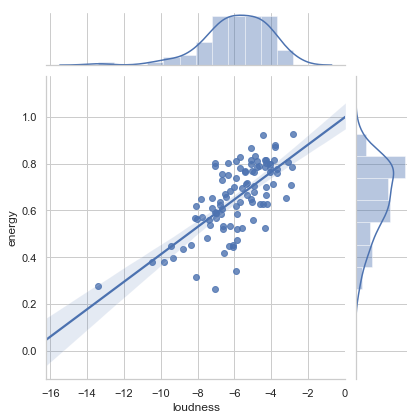

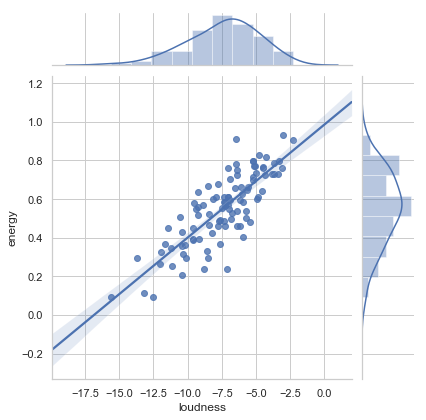

In [37]:
sns.jointplot('loudness','energy', data=df2,kind='reg')
sns.jointplot('loudness','energy', data=df, kind='reg')

### Logistic Regression

I'll attempt to build a model to successfully predict whether any of the songs in my top 100 tracks would be on the top 100 most played tracks on Spotify based on the track features discussed above.

Firstly, I've combined both datasets together in an excel sheet ('log.xlsx') with a new column denoting whether it is a top 100 most played track on Spotify, with '1' indicating that it is and '0' indicating otherwise. 

I will apply the logistic regression model to this dataset.

In [48]:
train = pd.read_excel('log.xlsx')

In [49]:
train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,Top 100 most played song?
0,0.302,0.696,292987,0.521,0.000000,10,0.0565,-8.465,0,0.3320,100.000,0.458,4,0
1,0.156,0.652,304607,0.795,0.000000,11,0.1230,-5.192,0,0.1740,135.018,0.788,4,0
2,0.498,0.736,230813,0.795,0.000001,1,0.2540,-3.299,0,0.0545,104.066,0.511,4,0
3,0.126,0.624,234213,0.460,0.000000,6,0.0871,-6.403,0,0.2870,166.033,0.643,4,0
4,0.874,0.776,210285,0.503,0.000000,0,0.1120,-5.732,0,0.2370,110.134,0.473,4,0


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'time_signature',
       'Top 100 most played song?'],
      dtype='object')

In [55]:
X = train[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'time_signature']]
y = train['Top 100 most played song?']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

D:\Programs\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
predictions = logmodel.predict(X_test)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.51      0.69      0.59        29
           1       0.57      0.39      0.46        31

   micro avg       0.53      0.53      0.53        60
   macro avg       0.54      0.54      0.52        60
weighted avg       0.54      0.53      0.52        60



### Classification report 

The model applied to the dataset achieved scores of 54%, 53% and 52% for precision, recall and f1-score respectively. 

The accuracy values were not as good as I had hoped for. The recall scores however, indicates that it may be easier to classify a non top 100 most played song on Spotify compared to one that was indeed a top 100 most played song.

In conclusion, the results reveal that it is not possible to successfully predict whether or not a track is a hit song, using the dataset compiled. I would not consider the 53% accuracy to suggest that it is possible to predict whether a song would be a top 100 most played song based on its audio features.

# Conclusion

The aim of this project was to investigate whether or not it was possible to use machine learning techniques to predict whether a song would end up in Spotify's top 100 most played list based on it's audio features. I have concluded that it is not possible to predict a top 100 song based on audio features alone.

However, this project has helped gain an insight to my musical preferences and allowed me to work with data for one of my biggest interests. From dealing with API's (Spotify) for data gathering as well as machine learning models for classification, this project has helped further my understanding in both Python as well as data analysis/visualization.

